## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.




### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [22]:
df=pd.read_csv("dataset.csv")

In [23]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   uid                1048575 non-null  int64  
 1   asin               1048575 non-null  object 
 2   title              1048575 non-null  object 
 3   stars              1048575 non-null  float64
 4   reviews            1048575 non-null  int64  
 5   price              1048575 non-null  float64
 6   isBestSeller       1048575 non-null  bool   
 7   boughtInLastMonth  1048575 non-null  int64  
 8   category           1048575 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 65.0+ MB


In [25]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [26]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [27]:
df.sample(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
961447,1053751,B0CHW71J7X,Women's Fleece Jacket with Hood Plush Fleece J...,0.0,0,29.46,False,0,Sports & Outdoors
872836,950177,B004N5C7EA,C2G TruLink DVI Over Cat5 Extender,0.0,0,145.00,False,0,KVM Switches
265045,281867,B0973QK1JB,"Elemis Superfood Midnight Facial & Facial Oil,...",4.5,827,44.00,False,800,Skin Care
478665,514550,B09HKS3CXY,Salewa Herren Puez 2 Dst M Fz Hdy PUEZ 2 DST M...,5.0,1,82.49,False,0,Sports & Outdoors
654162,703155,B0B8Z5C6RD,288pcs Short False Nails Matte Round Press on ...,3.6,235,7.99,False,0,Manicure & Pedicure Products
833017,908209,B019FPQZNG,Jolly Thinkers PJOL01 Deception: Murder in Hon...,4.7,2293,34.74,False,0,Games & Game Accessories
156843,168842,B09GNF55MV,Men/Women's Winter Warm Gloves Fleece Lined No...,0.0,0,23.44,False,0,Sports & Outdoors
948717,1034420,B0CDX6YR78,Leopard Printed Mens Shirts Hawaiian Short Sle...,0.0,0,16.99,False,0,Sports & Outdoors
101540,109857,B01MY874SV,ASSO New Bullet Proof Copolymer Sea und Karpfe...,5.0,3,13.99,False,0,Microphones
395730,422351,B0BV31841X,Ziener Intre Band,0.0,0,15.69,False,0,Sports & Outdoors



---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

In [28]:
# Generating a crosstab for 'category and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'],  df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4049,2
Abrasive & Finishing Products,245,5
Agricultural Equipment & Supplies,8421,109
Alexa Built-In Devices,106,1
...,...,...
Wearable Technology,1575,29
Wind Instruments,243,7
Window Treatments,234,5


In [29]:
sorted_result = crosstab_result.sort_values(by=True, ascending=False)
sorted_result[:10]

isBestSeller,False,True
category,,
Pet Supplies,9152,285
Sports & Outdoors,414661,173
PC & Video Games,6008,157
Storage & Organisation,9414,155
Hardware,8424,146
Agricultural Equipment & Supplies,8421,109
Boys,11702,87
Car & Motorbike,9296,87
Small Kitchen Appliances,8129,76


In [30]:
best_seller_counts = df[df['isBestSeller']]['category'].value_counts()

In [15]:
best_seller_counts

category
Pet Supplies                              285
Sports & Outdoors                         173
PC & Video Games                          157
Storage & Organisation                    155
Hardware                                  146
                                         ... 
Lab & Scientific Products                   1
Motorbike Exhaust & Exhaust Systems         1
Motorbike Handlebars, Controls & Grips      1
Smart Speakers                              1
Motorbike Engines & Engine Parts            1
Name: count, Length: 121, dtype: int64

### part1.2 
### Chi-square tests

In [16]:
from scipy.stats import chi2_contingency

# Chi-square test for 'best-seller' and 'product category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(9766.001987971133, 0.0)

### since the p-value is reported as 0.0, it's below the typical significance level of 0.05. this means that there is a significant association between the two categorical variables being tested.

### Cramér's V
Let's compute Cramér's V for `BestSeller` and `category` to measure the strength of their association.

In [17]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.09650696426702056

<Axes: xlabel='category'>

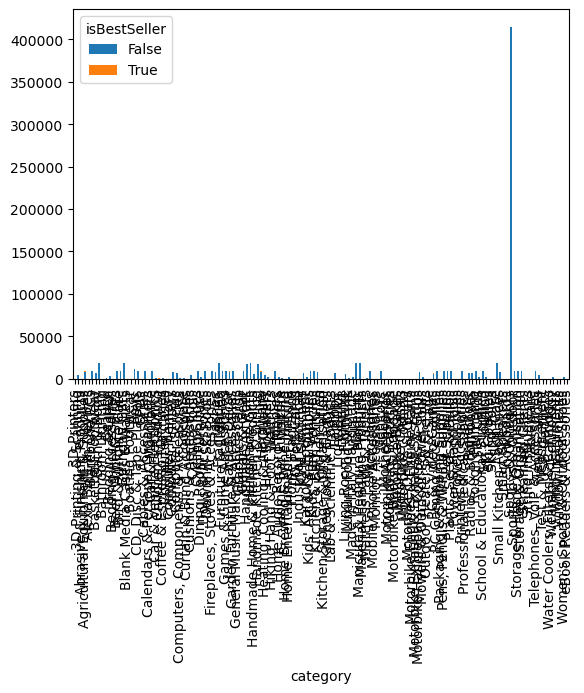

In [18]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---